# 비지도학습 과제
### 전처리 2차시에서 진행한 실습에서 이어지는 내용입니다.
### 2차시에서 최종적으로 저장한 hyundi_preprocessed.csv 파일을 활용해 비지도학습 클러스터링을 진행합니다.

### 파일 불러오기

In [15]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('hyundi_preprocessed.csv', index_col=0)

In [5]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,7,2017,7999,0,17307,0,145.0,58.9,1.2
1,12,2016,14499,2,25233,2,235.0,43.5,2.0
2,12,2016,11399,0,37877,2,30.0,61.7,1.7
3,5,2016,6499,0,23789,0,20.0,60.1,1.0
4,6,2015,10199,0,33177,2,160.0,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4854,15,2019,29995,3,1567,2,145.0,39.8,2.2
4856,9,2015,7830,0,59508,2,30.0,65.7,1.7
4857,5,2017,6830,0,13810,0,20.0,60.1,1.0
4858,12,2018,13994,0,23313,0,145.0,44.8,1.6


# 지금부터 df를 활용해 K-means Clustering을 진행하시면 됩니다.
* 다양한 클러스터를 만들며, 클러스터링에 익숙해지는 자유도 높은 과제 입니다.
* 비지도학습 K-means Clustering 강의 및 자료를 활용해 현대 중고차에 대한 클러스터링 분석을 자유롭게 진행해보세요.
* 분석을 위해 모든 열을 다 사용해도 되고, 몇 가지 열을 골라서 진행해도 됩니다!

In [124]:
# 분석을 진행할 열 3개를 가져옵니다.
df_new = df[['price','year','mileage']]

df_new

,price,year,mileage
0,7999,2017,17307
1,14499,2016,25233
2,11399,2016,37877
3,6499,2016,23789
4,10199,2015,33177
...,...,...,...
4854,29995,2019,1567
4856,7830,2015,59508
4857,6830,2017,13810
4858,13994,2018,23313


In [297]:
from sklearn.cluster import KMeans


# KMeans 클러스터링 모델 생성
km = KMeans(n_clusters=3,
            init ='random', # 매개변수
            n_init = 10, # 초기화 횟수
            max_iter = 300, # 최대 반복수
            tol = 1e-04, # 오차 한계값
            random_state=0
           )

# 클러스터링 수행
y_km = km.fit_predict(df_new) # ****부분을 적절한 값으로 교체해주세ㅛㅇ.

# 클러스터링 결과 출력
df_new['cluster_label'] = y_km
print(df_new)

      price  year  mileage  cluster_label
0      7999  2017    17307              1
1     14499  2016    25233              0
2     11399  2016    37877              0
3      6499  2016    23789              0
4     10199  2015    33177              0
...     ...   ...      ...            ...
4854  29995  2019     1567              1
4856   7830  2015    59508              2
4857   6830  2017    13810              1
4858  13994  2018    23313              0
4859  15999  2016    11472              1

[4592 rows x 4 columns]


/var/folders/w4/tykm_45x4bxdj2p9kjtbk3b00000gn/T/ipykernel_14194/2026657536.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cluster_label'] = y_km


In [298]:
# 클러스터 중심점 확인
centers = km.cluster_centers_[:,[0,2]] # 중심을 확인하는 코드를 넣어주세요

centers

array([[10722.94772036, 29973.84924012],
       [14962.68804091,  9124.25059009],
       [ 8123.18024691, 60708.70864198]])

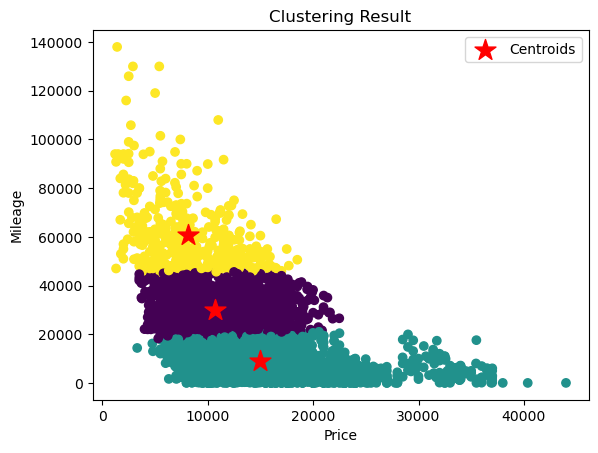

In [299]:
# 클러스터링 결과 시각화
import matplotlib.pyplot as plt

# 4800여개의 데이터를 점 찍는 작업입니다.
plt.scatter(x = df['price'], 
            y = df['mileage'], 
            c = y_km, 
            cmap='viridis')  # x, y, c에 값을 집어넣어주세요

# 각 cluster의 중심을 점 찍는 작업입니다.
plt.scatter(x = centers[:, 0],
            y = centers[:, 1],
            marker='*', 
            s=250, 
            color='red',
            label='Centroids') # x,y에 값을 집어넣어주세요



plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Clustering Result')
plt.legend()
plt.show()

# 아래부터는 배운 내용을 바탕으로 다양한 cluster 분석을 진행해주세요.

In [300]:
df_mine = df # df 가져오기

In [301]:
df_mine

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,7,2017,7999,0,17307,0,145.0,58.9,1.2
1,12,2016,14499,2,25233,2,235.0,43.5,2.0
2,12,2016,11399,0,37877,2,30.0,61.7,1.7
3,5,2016,6499,0,23789,0,20.0,60.1,1.0
4,6,2015,10199,0,33177,2,160.0,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4854,15,2019,29995,3,1567,2,145.0,39.8,2.2
4856,9,2015,7830,0,59508,2,30.0,65.7,1.7
4857,5,2017,6830,0,13810,0,20.0,60.1,1.0
4858,12,2018,13994,0,23313,0,145.0,44.8,1.6


In [302]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [303]:
X = df_mine.drop('price', axis=1)
y = df_mine['price'] 

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [305]:
print("X_train:")
print(X_train.shape)

print("\ny_train:")
print(y_train.shape)

print("\nX_test:")
print(X_test.shape)

print("\ny_test:")
print(y_test.shape)

X_train:
(3214, 8)

y_train:
(3214,)

X_test:
(1378, 8)

y_test:
(1378,)


In [306]:
# 데이터 표준화
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [307]:
# 표준화 전처리된 훈련 데이터셋의 공분산 행렬 계산
dot_mat = np.cov(X_train_std.T)
# 고윳값 분해 수행
eigen_vals, eigen_vecs = np.linalg.eig(dot_mat)
eigen_vals

array([2.79230686, 2.03420705, 1.30046105, 0.73032891, 0.07658095,
       0.23398513, 0.27120393, 0.563416  ])

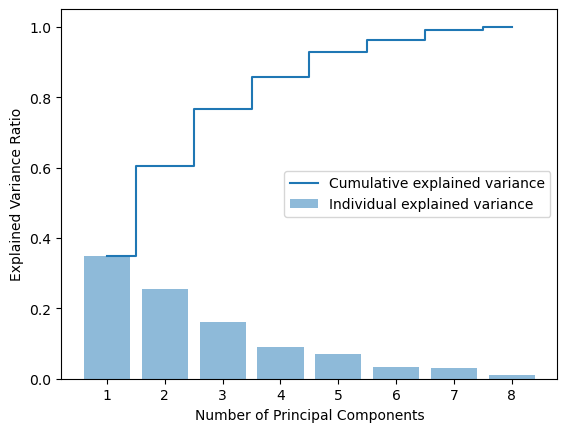

In [308]:
# 데이터셋을 새로운 특성 부분 공간으로 압축하여 줄여야 하기 때문에 가장 많은 정보(분산)를 가진 고유 벡터(주성분) 일부만 선택
# 고윳값은 고유벡터의 크기를 결정하므로 고윳값을 내림차순으로 정렬
# 설명된 분산 비율: 전체 고윳값의 합에서 고윳값의 비율

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,9), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 9), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.legend(loc='best')
plt.show()

In [309]:
from mpl_toolkits.mplot3d import Axes3D

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]


eigen_pairs.sort(key=lambda k: k[0], reverse=True)


W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
               eigen_pairs[2][1][:, np.newaxis],
               eigen_pairs[3][1][:, np.newaxis],
               eigen_pairs[4][1][:, np.newaxis]))
print(W)

[[-0.51749185 -0.04118731 -0.08533837 -0.35373115  0.00827508]
 [-0.17510914  0.52817109 -0.39439898 -0.15765145 -0.08624974]
 [-0.39487864  0.021937   -0.05658418  0.74069755  0.52473682]
 [ 0.05881055 -0.56720386  0.38663819  0.05398408 -0.1116486 ]
 [-0.42272797 -0.36496333 -0.33887797 -0.01657783 -0.20353183]
 [-0.28581097  0.30119318  0.36796493  0.38850693 -0.72847958]
 [ 0.15807701 -0.36374215 -0.63074025  0.26454396 -0.35757923]
 [-0.50673066 -0.20227096  0.19080415 -0.27798776  0.06861308]]


In [310]:
X_train_std[0].dot(W)

array([-0.8231163 ,  1.65347172,  1.11478635, -1.35423118,  0.29937237])

In [311]:
X_train_pca = X_train_std.dot(W)

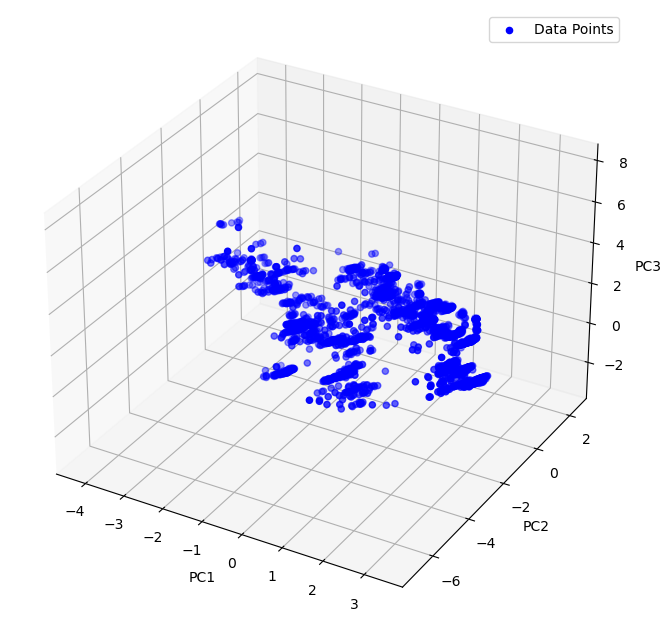

In [312]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c='b', marker='o', label='Data Points')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.legend()

plt.show()


In [313]:
df_sel = df_mine.iloc[:, :5]

In [314]:
df_sel

,model,year,price,transmission,mileage
0,7,2017,7999,0,17307
1,12,2016,14499,2,25233
2,12,2016,11399,0,37877
3,5,2016,6499,0,23789
4,6,2015,10199,0,33177
...,...,...,...,...,...
4854,15,2019,29995,3,1567
4856,9,2015,7830,0,59508
4857,5,2017,6830,0,13810
4858,12,2018,13994,0,23313


In [315]:
# KMeans 클러스터링 모델 생성
km = KMeans(n_clusters=5,
            init ='random', # 매개변수
            n_init = 10, # 초기화 횟수
            max_iter = 300, # 최대 반복수
            tol = 1e-04, # 오차 한계값
            random_state=0
           )

# 클러스터링 수행
y_km = km.fit_predict(df_sel)

# 클러스터링 결과 출력
df_sel['cluster_label'] = y_km
print(df_sel)

      model  year  price  transmission  mileage  cluster_label
0         7  2017   7999             0    17307              3
1        12  2016  14499             2    25233              3
2        12  2016  11399             0    37877              4
3         5  2016   6499             0    23789              3
4         6  2015  10199             0    33177              4
...     ...   ...    ...           ...      ...            ...
4854     15  2019  29995             3     1567              0
4856      9  2015   7830             0    59508              2
4857      5  2017   6830             0    13810              1
4858     12  2018  13994             0    23313              3
4859     12  2016  15999             2    11472              1

[4592 rows x 6 columns]


In [316]:
df_sel

,model,year,price,transmission,mileage,cluster_label
0,7,2017,7999,0,17307,3
1,12,2016,14499,2,25233,3
2,12,2016,11399,0,37877,4
3,5,2016,6499,0,23789,3
4,6,2015,10199,0,33177,4
...,...,...,...,...,...,...
4854,15,2019,29995,3,1567,0
4856,9,2015,7830,0,59508,2
4857,5,2017,6830,0,13810,1
4858,12,2018,13994,0,23313,3


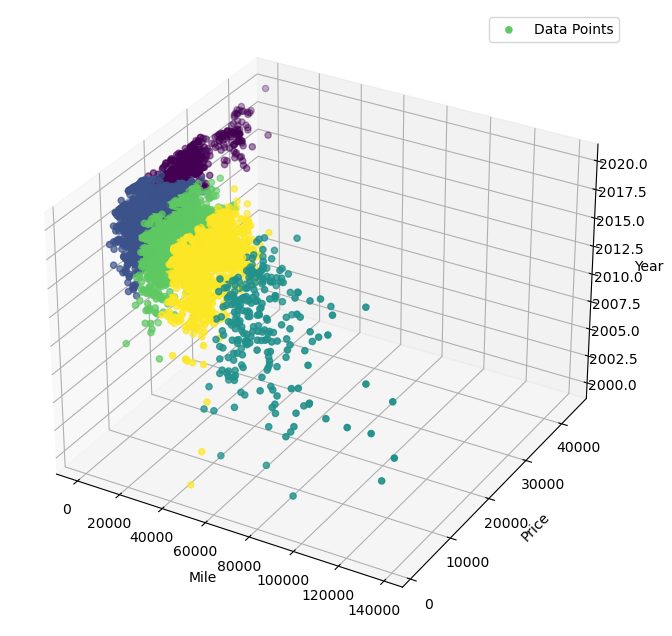

In [329]:
X = df_mine[['mileage', 'price', 'year']].values

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_km, marker='o', label='Data Points')


ax.set_xlabel('Mile')
ax.set_ylabel('Price')
ax.set_zlabel('Year')

ax.legend()

plt.show()